<a href="https://www.kaggle.com/code/salilapte/rsa-side-channel-basic?scriptVersionId=225568429" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install pycryptodome

In [12]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP
from Crypto.Random import get_random_bytes

In [3]:
# Generate RSA key pair
def generate_rsa_keys():
    key = RSA.generate(2048)
    private_key = key.export_key()
    public_key = key.publickey().export_key()
    return private_key, public_key

In [5]:
# Encrypt message
def encrypt_message(public_key, message):
    rsa_key = RSA.import_key(public_key)
    cipher = PKCS1_OAEP.new(rsa_key)
    ciphertext = cipher.encrypt(message)
    return ciphertext

In [6]:
# Decrypt message with timing measurement
def decrypt_message(private_key, ciphertext):
    rsa_key = RSA.import_key(private_key)
    cipher = PKCS1_OAEP.new(rsa_key)
    start_time = time.time()
    plaintext = cipher.decrypt(ciphertext)
    end_time = time.time()
    return plaintext, (end_time - start_time)

In [7]:
# Simulate side-channel timing attack
def timing_attack(private_key, public_key, trials=1000):
    attack_data = []
    for _ in range(trials):
        message = get_random_bytes(16)  # Random message
        ciphertext = encrypt_message(public_key, message)
        _, decryption_time = decrypt_message(private_key, ciphertext)
        attack_data.append(decryption_time)
    return np.array(attack_data)

In [10]:
# Visualization functions
def plot_histogram(data):
    plt.figure(figsize=(8, 5))
    plt.hist(data, bins=50, alpha=0.7, edgecolor='black')
    plt.xlabel("Decryption Time (seconds)")
    plt.ylabel("Frequency")
    plt.title("Histogram of Decryption Times")
    plt.show()

def plot_boxplot(data):
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=data)
    plt.ylabel("Decryption Time (seconds)")
    plt.title("Box Plot of Decryption Times")
    plt.show()

def plot_scatter(data):
    plt.figure(figsize=(8, 5))
    plt.scatter(range(len(data)), data, alpha=0.6)
    plt.xlabel("Trial Number")
    plt.ylabel("Decryption Time (seconds)")
    plt.title("Scatter Plot of Decryption Time vs. Trial")
    plt.show()

def plot_time_series(data):
    plt.figure(figsize=(8, 5))
    plt.plot(data, marker='o', linestyle='-', markersize=2)
    plt.xlabel("Trial Number")
    plt.ylabel("Decryption Time (seconds)")
    plt.title("Time-Series Plot of Decryption Times")
    plt.show()

def plot_kde(data):
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data, fill=True)
    plt.xlabel("Decryption Time (seconds)")
    plt.ylabel("Density")
    plt.title("KDE Plot of Decryption Times")
    plt.show()

Timing Attack Data Collected:
[0.00159144 0.00157309 0.00159526 0.00162315 0.0015862  0.00158668
 0.00161099 0.00157452 0.00166631 0.00160098]


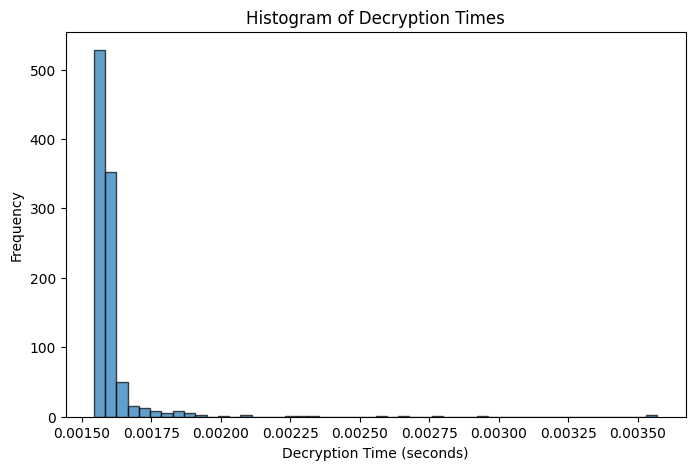

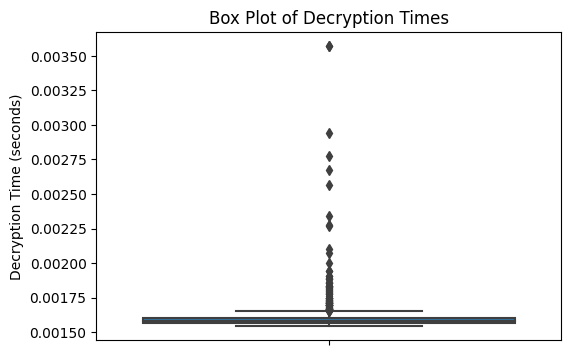

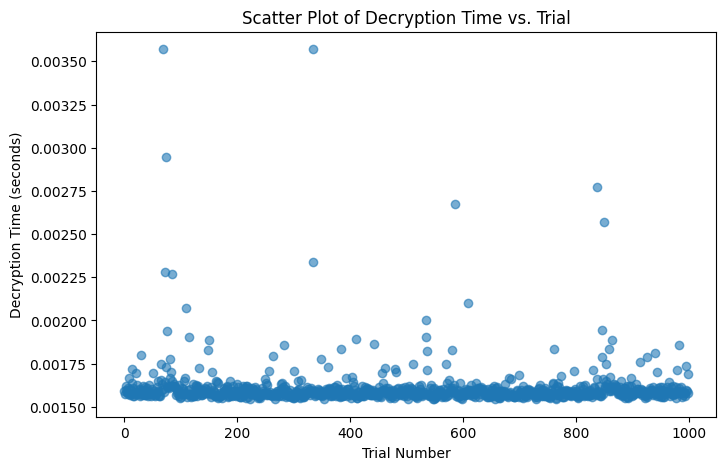

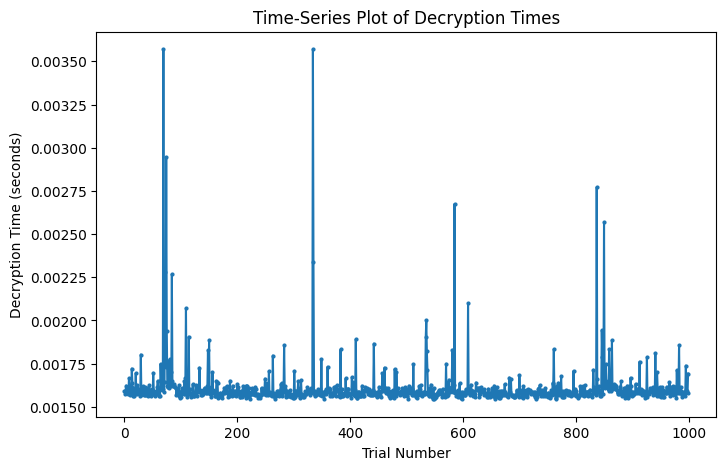

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


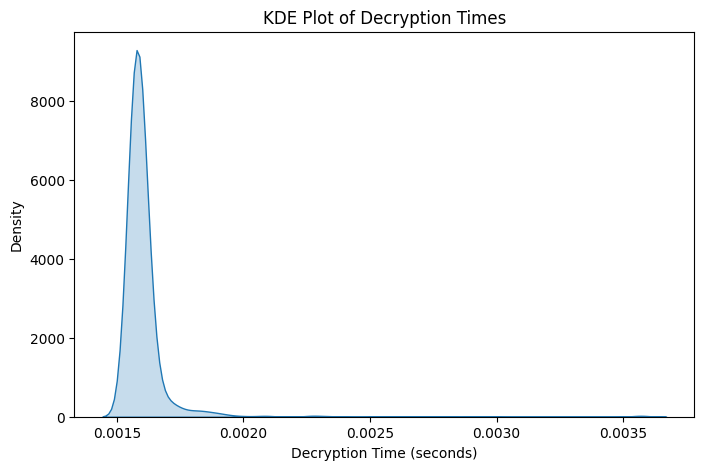

In [13]:
# Main execution
if __name__ == "__main__":
    private_key, public_key = generate_rsa_keys()
    attack_data = timing_attack(private_key, public_key)
    
    print("Timing Attack Data Collected:")
    print(attack_data[:10])  # Print first 10 samples
    
    # Generate visualizations
    plot_histogram(attack_data)
    plot_boxplot(attack_data)
    plot_scatter(attack_data)
    plot_time_series(attack_data)
    plot_kde(attack_data)